In [2]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras import regularizers

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
!pip install tensorflow-addons==0.16.1
import tensorflow_addons as tfa
import random
import numpy as np

from tensorflow.python.client import device_lib
device_lib.list_local_devices()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 9.7 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.6.0 and strictly below 2.9.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.12.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7990722843546473484
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14343274496
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 8700347748640101997
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteHNWHL0/oxford_flowers102-train.tfrecord*…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteHNWHL0/oxford_flowers102-test.tfrecord*.…

Generating validation examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteHNWHL0/oxford_flowers102-validation.tfre…

Dataset oxford_flowers102 downloaded and prepared to /root/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


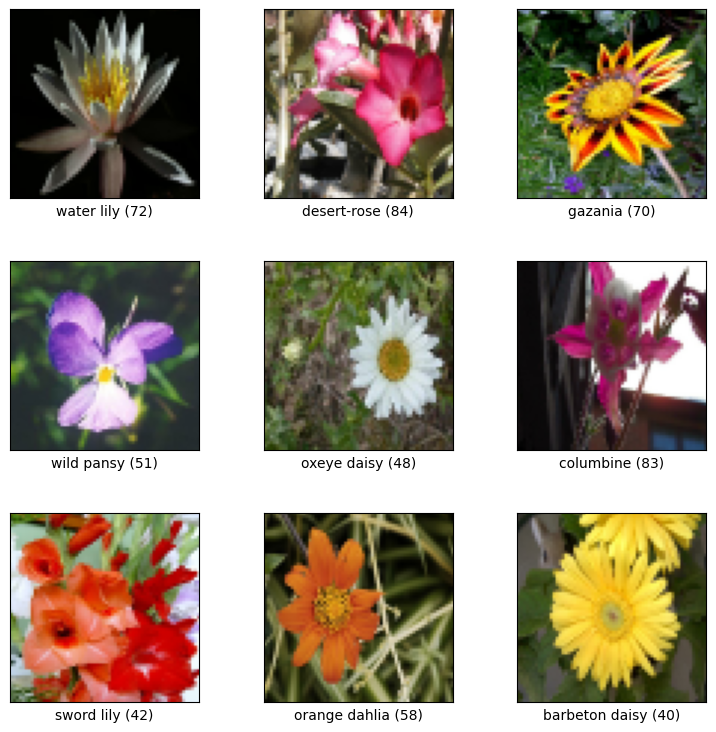

In [3]:


#Load the training and testing dataset
#TODO Validation dataset
(ds_train, ds_test, ds_val), ds_info = tfds.load('oxford_flowers102',
                                            split=['train', 'test', 'validation'],
                                            with_info=True,
                                            shuffle_files=True,
                                            as_supervised=True)




#This gets the images ready
shape = (128, 128, 3)
big_shape = (200,200,3)
small_shape = (64, 64, 3)
n_labels = 102
def normalize_img(img, label):
    img = tf.image.resize(img,shape[:2])
    img = tf.cast(img, tf.float32) / 255


    return (img, label)


def resize_img(img, label):
    img = tf.image.resize(img,small_shape[:2])
    return (img, label)


def randomize_img1(img, label):
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_brightness(img,0.15)
    img = tf.image.random_contrast(img,0.5,0.9)
    img = tf.image.random_saturation(img, 0.5,0.9)
    img = tf.image.random_hue(img, 0.2)
    return (img, label)


def randomize_img2(img, label):
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_saturation(img, 0.4,0.9)
    return (img, label)


def randomize_img3(img, label):
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_brightness(img,0.15)
    img = tf.image.random_contrast(img,0.3,0.9)
    return (img, label)


def randomize_saturation(img, label):
    img = tf.image.random_saturation(img, 0.5,0.9)
    img = tf.image.random_hue(img, 0.025)
    return (img, label)




def randomize_brightness(img, label):
    img = tf.image.random_brightness(img,0.05)
    img = tf.image.random_contrast(img,0.5,0.9)
    return (img, label)


def random_flip_img(img, label):
    img = tf.image.random_flip_left_right(img)
    return (img, label)


def rotate_img(img, label):
    img = tfa.image.rotate(img, angles=0.5)
    return (img, label)


def random_crop(img, label):
    img = tf.image.resize(img,big_shape[:2])
    img = tf.image.random_crop(img, (128,128,3))
    return (img, label)


def random_move_img(img, label):
    img = tfa.image.rotate(img, angles=random.uniform(-0.5, 0.5))
    img = tfa.image.translate(img, [np.random.random()*30-15,np.random.random()*30-15])
    return (img, label)


def random_test(img, label):
   
    return (img, label)


def random_cutout(img, label):
    cutout_size = random.randint(16,48)
    n_cutouts = random.randint(2,5)
    for _ in range(n_cutouts):
        # image.cutout needs a 4d tensor but img is a 3d tensor
        img = tf.expand_dims(img, 0)
        img = tfa.image.cutout(img, 32,
                               [random.randint(0, shape[0]), random.randint(0, shape[1])])
        img = img[0,]
    return img, label


def random_image_warp(img, label):
    n_warp_points = 25
    offset = 5
   
    offsets = tf.random.uniform(shape = [n_warp_points, 2], minval = -offset, maxval = offset)
    src_points = tf.random.uniform(shape = [n_warp_points, 2], maxval = shape[0])
    dest_points = src_points + offsets
    img, flow = tfa.image.sparse_image_warp([img], [src_points], [dest_points])
    img = img[0,]
    return img, label






def random_randomthings(img, label):
    for i in range (0,random.randint(1,4)):
        random_value = random.randint(0,6)
        if random_value == 0:
            img, label = random_flip_img(img, label)
        elif random_value == 1:
            img, label = random_move_img(img, label)
        elif random_value == 2:
            img, label = randomize_brightness(img, label)
        elif random_value == 3:
            img, label = randomize_brightness(img, label)
        elif random_value == 4:
            img, label = randomize_saturation(img, label)
        elif random_value == 5:
            img =  tf.image.random_contrast(img,0.3,0.9)
        # elif random_value == 6:
        #     img, label = random_crop(img, label)


    return (img, label)




AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 32
ds_train = ds_train.map(normalize_img, num_parallel_calls=AUTOTUNE)
#ds_train = ds_train.map(randomize_saturation, num_parallel_calls=AUTOTUNE)





#Random Brightness
ds_brightness_train = ds_train.map(randomize_brightness)
ds_brightness2_train = ds_train.map(randomize_brightness)
ds_brightness3_train = ds_train.map(randomize_brightness)

#Random Brightness and crop
ds_brightness_crop_train = ds_train.map(randomize_brightness)
ds_brightness_crop_train = ds_brightness_crop_train.map(random_crop)

ds_brightness_crop2_train = ds_train.map(randomize_brightness)
ds_brightness_crop2_train = ds_brightness_crop2_train.map(random_crop)

#Random Saturation
ds_saturation_train = ds_train.map(randomize_saturation)
ds_saturation2_train = ds_train.map(randomize_saturation)
ds_saturation3_train = ds_train.map(randomize_saturation)

#Random Saturation and crop
ds_saturation_crop_train = ds_train.map(randomize_saturation)
ds_saturation_crop_train = ds_saturation_crop_train.map(random_crop)

ds_saturation_crop2_train = ds_train.map(randomize_saturation)
ds_saturation_crop2_train = ds_saturation_crop2_train.map(random_crop)


#Random Crop
ds_crop_train = ds_train.map(random_crop)
ds_crop2_train = ds_train.map(random_crop)
ds_crop3_train = ds_train.map(random_crop)


#Random Move
ds_move_train = ds_train.map(random_move_img)
ds_move2_train = ds_train.map(random_move_img)
ds_move3_train = ds_train.map(random_move_img)
ds_move4_train = ds_train.map(random_move_img)

#Random cutout
ds_cutout_train = ds_train.map(random_cutout)
ds_cutout2_train = ds_train.map(random_cutout)
ds_cutout3_train = ds_train.map(random_cutout)

#Random Warp
ds_warp_train = ds_train.map(random_image_warp)
ds_warp2_train = ds_train.map(random_image_warp)
ds_warp3_train = ds_train.map(random_image_warp)

#Random lots
ds_random_train = ds_train.map(randomize_brightness)
ds_random_train = ds_random_train.map(random_image_warp)
ds_random_train = ds_random_train.map(random_move_img)

ds_randomv2_train = ds_train.map(randomize_brightness)
ds_randomv2_train = ds_randomv2_train.map(random_image_warp)
ds_randomv2_train = ds_randomv2_train.map(random_move_img)


#Random lotsV2
ds_random2v2_train = ds_train.map(randomize_saturation)
ds_random2v2_train = ds_random2v2_train.map(random_image_warp)
ds_random2v2_train = ds_random2v2_train.map(random_cutout)
ds_random2v2_train = ds_random2v2_train.map(random_move_img)

ds_random2_train = ds_train.map(randomize_saturation)
ds_random2_train = ds_random2_train.map(random_image_warp)
ds_random2_train = ds_random2_train.map(random_cutout)
ds_random2_train = ds_random2_train.map(random_move_img)


#Random lots v3
ds_random3_train = ds_train.map(randomize_saturation)
ds_random3_train = ds_random3_train.map(random_image_warp)
ds_random3_train = ds_random3_train.map(random_cutout)
ds_random3_train = ds_random3_train.map(random_move_img)
ds_random3_train = ds_random3_train.map(randomize_saturation)

ds_random3v2_train = ds_train.map(randomize_saturation)
ds_random3v2_train = ds_random3v2_train.map(random_image_warp)
ds_random3v2_train = ds_random3v2_train.map(random_cutout)
ds_random3v2_train = ds_random3v2_train.map(random_move_img)
ds_random3v2_train = ds_random3v2_train.map(randomize_saturation)


#Random Lots v4
ds_random4_train = ds_train.map(randomize_brightness)
ds_random4_train = ds_random4_train.map(random_crop)
ds_random4_train = ds_random4_train.map(random_move_img)

ds_random4v2_train = ds_train.map(randomize_brightness)
ds_random4v2_train = ds_random4v2_train.map(random_crop)
ds_random4v2_train = ds_random4v2_train.map(random_move_img)


#Random Lots v5
ds_random5_train = ds_train.map(randomize_brightness)
ds_random5_train = ds_random5_train.map(random_crop)
ds_random5_train = ds_random5_train.map(random_move_img)
ds_random5_train = ds_random5_train.map(random_cutout)

ds_random5v2_train = ds_train.map(randomize_brightness)
ds_random5v2_train = ds_random5v2_train.map(random_crop)
ds_random5v2_train = ds_random5v2_train.map(random_move_img)
ds_random5v2_train = ds_random5v2_train.map(random_cutout)


#Random lots v6
ds_random6_train = ds_train.map(randomize_saturation)
ds_random6_train = ds_random6_train.map(random_move_img)
ds_random6_train = ds_random6_train.map(randomize_saturation)
ds_random6_train = ds_random6_train.map(random_image_warp)
ds_random6_train = ds_random6_train.map(random_crop)

ds_random6v2_train = ds_train.map(randomize_saturation)
ds_random6v2_train = ds_random6v2_train.map(random_move_img)
ds_random6v2_train = ds_random6v2_train.map(randomize_saturation)
ds_random6v2_train = ds_random6v2_train.map(random_image_warp)
ds_random6v2_train = ds_random6v2_train.map(random_crop)


ds_train = ds_train.concatenate(ds_brightness_train)
ds_train = ds_train.concatenate(ds_brightness2_train)
ds_train = ds_train.concatenate(ds_brightness3_train)
ds_train = ds_train.concatenate(ds_brightness_crop_train)
ds_train = ds_train.concatenate(ds_brightness_crop2_train)
ds_train = ds_train.concatenate(ds_saturation_train)
ds_train = ds_train.concatenate(ds_saturation2_train)
ds_train = ds_train.concatenate(ds_saturation3_train)
ds_train = ds_train.concatenate(ds_saturation_crop_train)
ds_train = ds_train.concatenate(ds_saturation_crop2_train)
ds_train = ds_train.concatenate(ds_crop_train)
ds_train = ds_train.concatenate(ds_crop2_train)
ds_train = ds_train.concatenate(ds_crop3_train)
ds_train = ds_train.concatenate(ds_move_train)
ds_train = ds_train.concatenate(ds_move2_train)
ds_train = ds_train.concatenate(ds_move3_train)
ds_train = ds_train.concatenate(ds_move4_train)
ds_train = ds_train.concatenate(ds_cutout_train)
ds_train = ds_train.concatenate(ds_cutout2_train)
ds_train = ds_train.concatenate(ds_cutout3_train)
ds_train = ds_train.concatenate(ds_random_train)
ds_train = ds_train.concatenate(ds_random2_train)
#ds_train = ds_train.concatenate(ds_randomv2_train)
#ds_train = ds_train.concatenate(ds_random2v2_train)
ds_train = ds_train.concatenate(ds_random3_train)
#ds_train = ds_train.concatenate(ds_random3v2_train)
ds_train = ds_train.concatenate(ds_random4_train)
#ds_train = ds_train.concatenate(ds_random4v2_train)
ds_train = ds_train.concatenate(ds_random5_train)
#ds_train = ds_train.concatenate(ds_random5v2_train)
ds_train = ds_train.concatenate(ds_random6_train)
#ds_train = ds_train.concatenate(ds_random6v2_train)
ds_train = ds_train.concatenate(ds_warp_train)
ds_train = ds_train.concatenate(ds_warp2_train)
ds_train = ds_train.concatenate(ds_warp3_train)


ds_flip_train = ds_train.map(random_flip_img)
ds_train = ds_train.concatenate(ds_flip_train)
#ds_train = ds_train.concatenate(ds_train)
ds_train = ds_train.map(resize_img)


tfds.visualization.show_examples(ds_train, ds_info)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(1000)
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(AUTOTUNE)


ds_test = ds_test.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_test =ds_test.map(resize_img)
ds_test = ds_test.batch(BATCH_SIZE)
ds_test = ds_test.prefetch(AUTOTUNE)


ds_val = ds_val.map(normalize_img, num_parallel_calls=AUTOTUNE)
ds_val =ds_val.map(resize_img)
ds_val = ds_val.cache()
ds_val = ds_val.shuffle(1000)
ds_val = ds_val.batch(BATCH_SIZE)
ds_val = ds_val.prefetch(AUTOTUNE)



In [4]:
print(ds_train.cardinality().numpy() * BATCH_SIZE)

61216


In [78]:
def residual(size):
  def layer(y):
    x = tf.keras.layers.Conv2D(size, (3,3), padding='same', activation="relu")(y)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(size, (3,3), padding='same', activation="relu")(y)
    x = tf.keras.layers.BatchNormalization()(x)
    y = tf.keras.layers.add([x, y])
    y = tf.keras.layers.Activation('relu')(y)
    return y
  return layer

mirrored_strategy = tf.distribute.MirroredStrategy()
with mirrored_strategy.scope():
    input = tf.keras.layers.Input(small_shape)
        
    x = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu")(input)
    x = tf.keras.layers.BatchNormalization()(x)
    x = residual(32)(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), strides=2)(x)
    
    x = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = residual(64)(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), strides=2)(x)
    
    x = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation="relu")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = residual(128)(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), strides=2)(x)
    
    x = tf.keras.layers.Conv2D(256, (3,3), padding='same', activation="relu")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = residual(256)(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), strides=2)(x)
    
    x = tf.keras.layers.Conv2D(256, (3,3), padding='same', activation="relu")(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = residual(256)(x)
    x = tf.keras.layers.MaxPooling2D((2, 2), strides=2)(x)
        
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
        
    x = tf.keras.layers.Dropout(0.5)(x)
    x = tf.keras.layers.Dense(2048, activation="relu", kernel_regularizer=regularizers.l2(l=0.001))(x)
    x = tf.keras.layers.Dropout(0.5)(x)
  
    output = tf.keras.layers.Dense(n_labels, activation="softmax")(x)

    model = tf.keras.Model(input, output)

    #Learning rate scheduler (EXPLAIN THIS)
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=0.001,
        decay_steps=10000,
        decay_rate=0.9
    )

    model.compile(
        optimizer=keras.optimizers.Adam(lr_schedule),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=["accuracy"],
    )

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_24 (InputLayer)          [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv2d_202 (Conv2D)            (None, 64, 64, 32)   896         ['input_24[0][0]']               
                                                                                                  
 batch_normalization_193 (Batch  (None, 64, 64, 32)  128         ['conv2d_202[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 conv2d_204 (Conv2D)            (None, 64, 64, 32)   9248        ['batch_normalization_193[

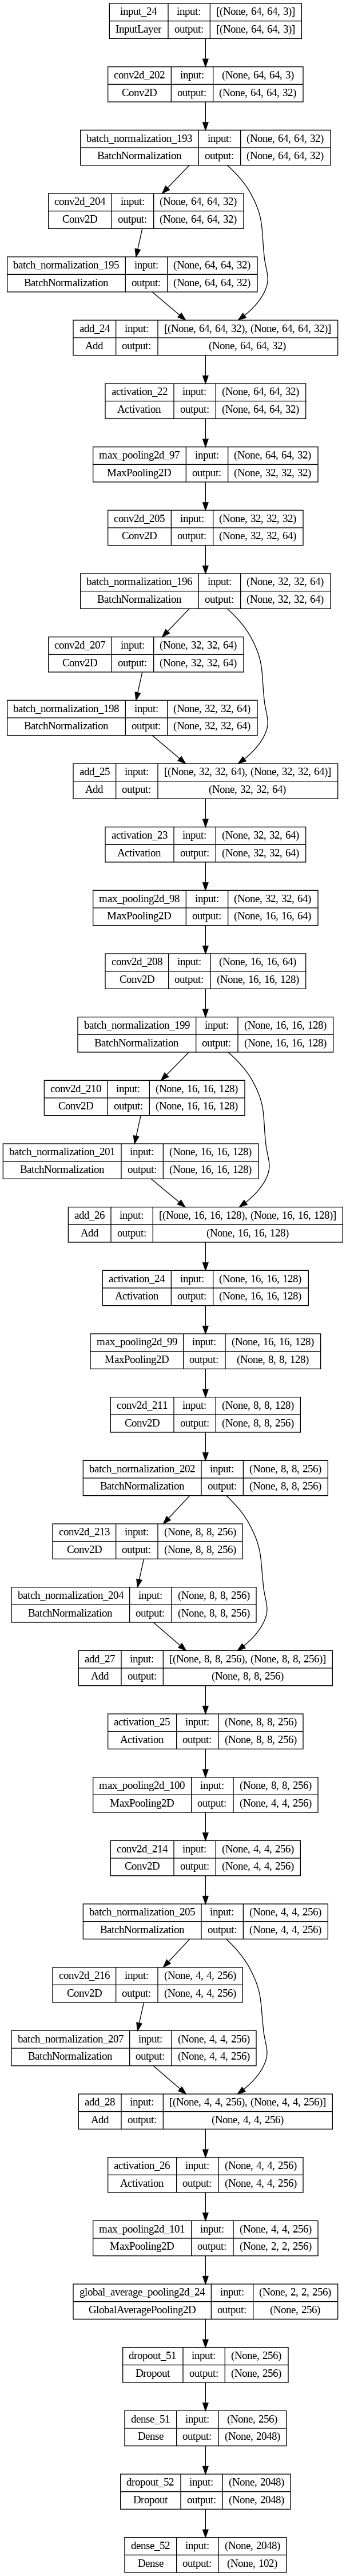

In [79]:
model.summary()
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [ ]:
#Train the model 
history = model.fit(
    ds_train,
    epochs=30,
    validation_data=ds_val)

Epoch 1/30
1913/1913 [==============================] - 54s 23ms/step - loss: 3.3031 - accuracy: 0.2477 - val_loss: 3.0473 - val_accuracy: 0.3529
Epoch 2/30
1913/1913 [==============================] - 44s 23ms/step - loss: 1.7837 - accuracy: 0.5931 - val_loss: 2.7746 - val_accuracy: 0.5108
Epoch 3/30
1913/1913 [==============================] - 44s 23ms/step - loss: 1.1443 - accuracy: 0.7740 - val_loss: 2.3396 - val_accuracy: 0.5775
Epoch 4/30
1913/1913 [==============================] - 43s 23ms/step - loss: 0.8534 - accuracy: 0.8514 - val_loss: 2.5866 - val_accuracy: 0.5784
Epoch 5/30
1913/1913 [==============================] - 43s 23ms/step - loss: 0.6894 - accuracy: 0.8888 - val_loss: 2.6772 - val_accuracy: 0.5529
Epoch 6/30
1913/1913 [==============================] - 43s 23ms/step - loss: 0.5967 - accuracy: 0.9101 - val_loss: 2.7894 - val_accuracy: 0.6010
Epoch 7/30
1913/1913 [==============================] - 44s 23ms/step - loss: 0.5168 - accuracy: 0.9260 - val_loss: 2.4485 -

193/193 - 10s - loss: 3.2606 - accuracy: 0.5980 - 10s/epoch - 52ms/step


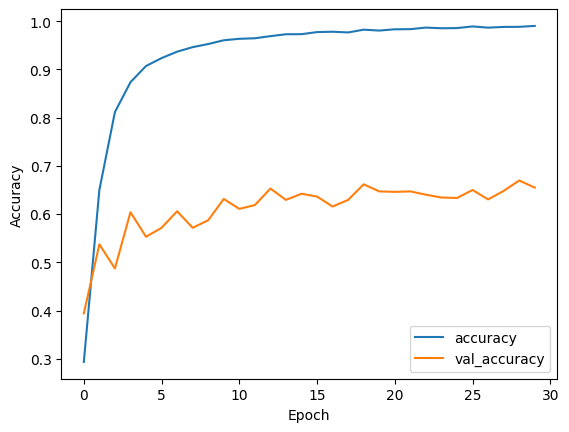

In [28]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(ds_test, verbose=2)